### Faculdade de Engenharia Industrial - FEI

### Centro Universitário da Fundação Educacional Inaciana "Padre Sabóia de Medeiros" (FEI)


*FEI's Stricto Sensu Graduate Program in Electrical Engineering*

Concentration area: ARTIFICIAL INTELLIGENCE APPLIED TO AUTOMATION AND ROBOTICS

Master's thesis student Andre Luiz Florentino

***

# Chapter 03: New dataset based on US8K - US8K_AV (Silence audio)

ASSUMPTION: run for dataset US8k:

* *01_Feature_extraction_exploration.ipynb*
* *02_PreProcessing_and_ML_modeling.ipynb*
***

## Libraries

In [100]:
import os
import zipfile
import mimetypes
import warnings
import glob
import librosa
import random
import pickle
import sklearn

import pandas            as pd
import numpy             as np
import seaborn           as sns
import IPython.display   as ipd
import matplotlib.ticker as ticker
import soundfile         as sf

from matplotlib  import pyplot as plt
from tqdm        import tqdm
from collections import Counter


In [101]:
# Solution to play .ogg files in the IPython 
# https://stackoverflow.com/questions/39077987/ipython-display-audio-cannot-correctly-handle-ogg-file-type

mimetypes.init()
mimetypes.add_type('audio/ogg','.ogg')

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 300)
pd.set_option('display.max_colwidth', 120)

## Loading the dataset and defining global variables

***

In [102]:
# Values for feature extraction
threshold   = 60
frames      = 44
time_length = 4
SR          = 22050

# For the picture names
pic_first_name = '03_New_dataset_US8K_AV_silence_audio_' 

# Global
current_path = os.getcwd()
dict_list    = []
path         = os.path.join(current_path, '_dataset', 'US8K_AV', 'Freesound')
path_conv    = os.path.join(current_path, '_dataset', 'US8K_AV', 'Freesound_conv')
path_norm    = os.path.join(current_path, '_dataset', 'US8K_AV', 'Freesound_norm')
path_folds   = os.path.join(current_path, '_dataset', 'US8K_AV', 'Folds')

path_models  = os.path.join(current_path, "US8K_AV_saved_models")
path_pic     = os.path.join(current_path, "US8K_AV_results")
path_US8K_AV = os.path.join(current_path, "_dataset", "US8K_AV")

nom_dataset = 'US8K_AV' 
csv_file    = 'US8K_AV.csv'
fold        = '1'

# Create output folder if it doesn't exist
if not os.path.exists(path_conv):
    os.makedirs(path_conv)
    
if not os.path.exists(path_norm):
    os.makedirs(path_norm)
    
if not os.path.exists(path_folds):
    os.makedirs(path_folds)
    
subfolders  = next(os.walk(path_folds))[1]

pkl_features          = 'US8K_AV_features_original.pkl'
pkl_aug_features      = 'US8K_AV_features_augmented_no_windowing.pkl'
pkl_aug_wind_features = 'US8K_AV_features_windowed.pkl' # augmented and windowed makes no sense. Dataset is already quite large

### Download silence audio files from Freesound.org

There is no free lunch here. One has to download file by file.

**readingroom.aif**

Binaural recording of the working silence of a research library, with its coughs, the movement of bodies and furniture, the turning of pages and the clicks of keyboards, even the unexpectedly obtrusive swallowing of the sound recordist. Near the end a recorded announcement informs readers that the reading room will shortly be closing. Recorded in Humanities 1 Reading Room, British Library, London, 25 September 2010.

https://freesound.org/people/bulldozia/sounds/107367/download/107367__bulldozia__readingroom.aiff
***
**silence 06-09-2012.wav**

The silence on the Alps.

https://freesound.org/people/wescwave/sounds/170017/download/170017__wescwave__silence-06-09-2012.wav
***
**RoomTone EmptyClassRoom 01 LONG 130626_00.flac**

Room-tone empty class-room in almost empty building in quiet street.
Some strange noise that sounds like shifting chairs in other room, but it's noise from the air-conditioning system. A little noise from outdoor. The air-flow whiz.
Room-size: 8x7x3 meter.

https://freesound.org/people/klankbeeld/sounds/192666/download/192666__klankbeeld__roomtone-emptyclassroom-01-long-130626_00.flac
***
**silence vinyl.wav**

Sound of an empty record played on a turntable.

https://freesound.org/people/il112/sounds/196153/download/196153__il112__silence-vinyl.wav
***
**silence.flac**

Silence underwater in a bathtub

https://freesound.org/people/wjoojoo/sounds/254197/download/254197__wjoojoo__silence.flac
***
**room-tone suburb 01 MS 150403_0573.wav**

MS recorded room-tone in apartment in suburban setting.

https://freesound.org/people/klankbeeld/sounds/268982/download/268982__klankbeeld__room-tone-suburb-01-ms-150403_0573.wav
***
**paving_silence.wav**

Room tone for the Footsteps pavement sound pack.

https://freesound.org/people/sturmankin/sounds/273135/download/273135__sturmankin__paving_silence.wav
***
**silence.wav**

No description.

https://freesound.org/people/jillvogel/sounds/277326/download/277326__jillvogel__silence.wav
***
**soil_silence.wav**

Room tone for the Footsteps soil sound pack.

https://freesound.org/people/sturmankin/sounds/278940/download/278940__sturmankin__soil_silence.wav
***
**Silence- stereo and high quality**

This a free, 10 minute demo of extremely high quality silence. It is stereo and has a high (96000) sample rate, and is probably the best quality silence sample around.

The poor-quality MP3 hosted on freesound is simply not enough. Download it and listen to the Flac to hear it as it was intended...

https://freesound.org/people/kwahmah_02/sounds/320807/download/320807__kwahmah_02__silence-stereo-and-high-quality.flac
***
**AMBLM tv studio room tone ambience noise lights off xy.wav**

Roomtone / silence / ambience / presence recorded in a tv studio with all lights off. Zoom H6 XY mics.

https://freesound.org/people/LudwigMueller/sounds/329550/download/329550__ludwigmueller__amblm-tv-studio-room-tone-ambience-noise-lights-off-xy.wav
***
**indoor_ apartments_hall_noise 2**

Hall in concrete prefab house, television sound coming from closed apartments.

https://freesound.org/people/Kostrava/sounds/333960/download/333960__kostrava__indoor_-apartments_hall_noise-2.wav
***
**top_of_hill_estialescq_minimal_soundscape.wav**

A quiet afternoon from the top of a hill near Estialescq.

https://freesound.org/people/joseph.larralde/sounds/352510/download/352510__josephlarralde__top_of_hill_estialescq_minimal_soundscape.wav
***
**Car_Ambiance_Edited.wav**

This is ambiance taken from the inside of a moving car. It captures accelerating, breaking, stopping, indicating and gear changing.

https://freesound.org/people/AmberdeMeillon/sounds/443044/download/443044__amberdemeillon__car_ambiance_edited.wav
***
**Silence Ambience.wav**

Silence ambience recorded with a boom mic in an open space in a surbub.

https://freesound.org/people/ayubwaguma/sounds/445762/download/445762__ayubwaguma__silence-ambience.wav
***
**dunes NL March 01 190328_1325.wav**

A very quiet day in the dunes in March in the south of the Netherlands...

https://freesound.org/people/klankbeeld/sounds/465062/download/465062__klankbeeld__dunes-nl-march-01-190328_1325.wav
***
**night.wav**

Recorded in the middle of the night and the great thing is: no man-made sounds.

What you hear is the river Tay in the distance and some Oystercatchers and apart from that: nothing! How brilliant in these days.

https://freesound.org/people/inchadney/sounds/476294/download/476294__inchadney__night.wav
***
**Cemetery Valencia Ambience 1**

Ambience from Valencia (Spain) City Cemetery.

https://freesound.org/people/emilijoan/sounds/506954/download/506954__emilijoan__cemetery-valencia-ambience-1.wav
***
**silence movie theater.wav**

Empty movie theater ambient.

https://freesound.org/people/IsraGallo/sounds/514305/download/514305__isragallo__silence-movie-theater.wav
***
**pernett_alex_baja_fidelidad_silencio.aif**

It struck me that this is the quietest it can be in my house, suppose you can't hear the birds, the cats, the traffic, us, nothing, but still there was no silence like I had. you imagine...

https://freesound.org/people/artesmediales/sounds/515112/download/515112__artesmediales__pernett_alex_baja_fidelidad_silencio.aiff
***
**empty shopping mall creepy corona silence sound effect**

Empty shopping mall creepy corona silence sound effect. recorded with sony pcm d100.

https://freesound.org/people/Garuda1982/sounds/544309/download/544309__garuda1982__empty-shopping-mall-creepy-corona-silence-sound-effect.wav
***
**Concert Hall Silence Ambiance.mp3**

A polite crowd making minute noises in an echoing concert hall. Made of multiple audio clips spliced together, in hopes that most transitions are seamless, and those that aren't can be easily edited. Taken with a black Sony IC recorder, at Boettcher Concert Hall with the Denver Young Artists Orchestra. Use however you wish. God bless!

https://freesound.org/people/FunWithSound/sounds/588400/download/588400__funwithsound__concert-hall-silence-ambiance.mp3
***
**empty room**

The sound of an empty room. Recorded with zoom h6n stereo.

https://freesound.org/people/frodeims/sounds/611590/download/611590__frodeims__empty-room.wav
***
**Airplane_Silent landscape.wav**

Airplane flying low over a silent natural landscape.
Recorded in the natural park of Hautes Fagnes in Belgium.

Binaural (DPA4060)

https://freesound.org/people/Mar.Sounds/sounds/627058/download/627058__marsounds__airplane_silent-landscape.wav
***
**Ambiance_Countryside (silence).wav**

Silent countryside ambiance, with birds and low highway rumble in the distance.
X/Y stereo (Zoom H5)

https://freesound.org/people/Mar.Sounds/sounds/627063/download/627063__marsounds__ambiance_countryside-silence.wav
***
**Car ambience OWI.wav**

The empty sound in a car when it is off and nobody is talking.

https://freesound.org/people/Jarryd28/sounds/655896/download/655896__jarryd28__car-ambience-owi.wav
***
**Ambience outside the car.wav**

The atmosphere outside a car in a field in the suburbs. Morning and spring outside.

https://freesound.org/people/Kim_Kimovna/sounds/693464/download/693464__kim_kimovna__ambience-outside-the-car.wav
***
**parkambience.wav**

Some park ambience. No people, just trees, birds and insects - some cars in the distance.

https://freesound.org/people/NistuGgner/sounds/699660/download/699660__nistuggner__parkambience.wav
***
**Silent Room Ambience_OWI**

A room covered in silence in the middle of the night, it has background noises to add to the effect.

https://freesound.org/people/Nyakallo_Moloi_21100482/sounds/708165/download/708165__nyakallo_moloi_21100482__silent-room-ambience_owi.wav
***
**Parking Lot Ambience: Cars driving by, people talking in the distance, tires on pavement, honking of car horn, low rumble. Recorded with ZoomH6 in stereo, with rifle microphone.**

Late afternoon recording with loads of vehicles passing and parking in Centurion Mall's parking lot. People are talking in the distance and car horns can be heard. The low rumble of the aircon machines are heard.

https://freesound.org/people/RileyB711/sounds/708192/download/708192__rileyb711__parking-lot-ambience-cars-driving-by-people-talking-in-the-distance-tires-on-pavement-honking-of-car-horn-low-rumble-recorded-with-zoomh6-in-stereo-with-rifle-microphone.wav
***
**Above the road/treet - Hon Kong ambience**

Recording from above the street with cars and buses passing by.

https://freesound.org/people/ivoliYT/sounds/723311/download/723311__ivoliyt__above-the-roadtreet-hon-kong-ambience.wav
***
**Ambience_city**

Ambience sound in sao paulo, distance sound of cars.


https://freesound.org/people/itabitencourt/sounds/727510/download/727510__itabitencourt__ambience_city.wav
***
**Street Ambience Day - trains in the distance - Melbourne, Australia**

Street Ambience Day - cars going by and train boom gates in the distance - Melbourne, Australia. Suburban street but moderately busy.

https://freesound.org/people/Sassaby/sounds/736583/download/736583__sassaby__street-ambience-day-trains-in-the-distance-melbourne-australia.wav
***

This is the list of downloaded files:

* 107367__bulldozia__readingroom.aiff
* 170017__wescwave__silence-06-09-2012.wav
* 192666__klankbeeld__roomtone-emptyclassroom-01-long-130626_00.flac
* 196153__il112__silence-vinyl.wav
* 254197__wjoojoo__silence.flac
* 268982__klankbeeld__room-tone-suburb-01-ms-150403_0573.wav
* 273135__sturmankin__paving_silence.wav
* 277326__jillvogel__silence.wav
* 278940__sturmankin__soil_silence.wav
* 320807__kwahmah_02__silence-stereo-and-high-quality.flac
* 329550__ludwigmueller__amblm-tv-studio-room-tone-ambience-noise-lights-off-xy.wav
* 333960__kostrava__indoor_-apartments_hall_noise-2.wav
* 352510__josephlarralde__top_of_hill_estialescq_minimal_soundscape.wav
* 443044__amberdemeillon__car_ambiance_edited.wav
* 445762__ayubwaguma__silence-ambience.wav
* 465062__klankbeeld__dunes-nl-march-01-190328_1325.wav
* 476294__inchadney__night.wav
* 506954__emilijoan__cemetery-valencia-ambience-1.wav
* 514305__isragallo__silence-movie-theater.wav
* 515112__artesmediales__pernett_alex_baja_fidelidad_silencio.aiff
* 544309__garuda1982__empty-shopping-mall-creepy-corona-silence-sound-effect.wav
* 588400__funwithsound__concert-hall-silence-ambiance.mp3
* 611590__frodeims__empty-room.wav
* 627058__marsounds__airplane_silent-landscape.wav
* 627063__marsounds__ambiance_countryside-silence.wav
* 655896__jarryd28__car-ambience-owi.wav
* 693464__kim_kimovna__ambience-outside-the-car.wav
* 699660__nistuggner__parkambience.wav
* 708165__nyakallo_moloi_21100482__silent-room-ambience_owi.wav
* 708192__rileyb711__parking-lot-ambience-cars-driving-by-people-talking-in-the-distance-tires-on-pavement-honking-of-car-horn-low-rumble-recorded-with-zoomh6-in-stereo-with-rifle-microphone.wav
* 723311__ivoliyt__above-the-roadtreet-hon-kong-ambience.wav
* 727510__itabitencourt__ambience_city.wav
* 736583__sassaby__street-ambience-day-trains-in-the-distance-melbourne-australia.wav

In [103]:
path

'C:\\Andre_Florentino\\03_particular\\04_mestrado-FEI\\97_master\\_dataset\\US8K_AV\\Freesound'

In [104]:
subfolders

['fold1',
 'fold10',
 'fold2',
 'fold3',
 'fold4',
 'fold5',
 'fold6',
 'fold7',
 'fold8',
 'fold9']

In [105]:
def convert_audio(file_path, output_path):
       
    # Load audio file
    y, _ = librosa.load(file_path, sr=SR, mono=True)
    
    duration = librosa.get_duration(y=y, sr=SR)

    # Save as .wav with 16-bit PCM encoding
    sf.write(output_path, y, SR, subtype='PCM_16')
    
    print(f'Duration of the loaded audio...: {duration:2f} s')
    
    return duration

In [106]:
## Iterate over all files in the input folder
#
#total_duration = 0
#
#for file_name in os.listdir(path):
#    file_path = os.path.join(path, file_name)
#    print(file_name)
#    
#    # Skip directories and non-audio files based on extension
#    if not os.path.isfile(file_path) or not file_name.lower().endswith(('.wav', '.flac', '.aiff', '.mp3')):
#        continue
#    
#    # Define output path with .wav extension
#    output_path = os.path.join(path_conv, os.path.splitext(file_name)[0] + '.wav')
#    
#    # Convert and save the audio file
#    duration = convert_audio(file_path, output_path)
#    total_duration = total_duration + duration
#    
#
#print("\nConversion complete!\n")
#print(f'Total duration of the loaded audio...: {total_duration/3600:2f} h')

Files were them renamed (33 files), keeping only the first 6 digits, and finally, converted to .WAV format.

* 107367.wav
* 170017.wav
* 192666.wav
* 196153.wav
* 254197.wav
* 268982.wav
* 273135.wav
* 277326.wav
* 278940.wav
* 320807.wav
* 329550.wav
* 333960.wav
* 352510.wav
* 443044.wav
* 445762.wav
* 465062.wav
* 476294.wav
* 506954.wav
* 514305.wav
* 515112.wav
* 544309.wav
* 588400.wav
* 611590.wav
* 627058.wav
* 627063.wav
* 655896.wav
* 693464.wav
* 699660.wav
* 708165.wav
* 708192.wav
* 723311.wav
* 727510.wav
* 736583.wav

In [107]:
def split_audio(file_path, output_base_name):
    # Load audio file
    y, _ = librosa.load(file_path, sr=SR, mono=True)
    
    # Define interval length (4 seconds)
    interval_length = 4 * SR
    
    # Calculate number of intervals (limit to 20)
    num_intervals = min(len(y) // interval_length + (1 if len(y) % interval_length != 0 else 0), 20)
    
    for i in range(num_intervals):
        start_sample = i * interval_length
        end_sample = min((i + 1) * interval_length, len(y))
        
        # Extract the segment
        y_segment = y[start_sample:end_sample]
        
        # Define output path for each segment with sequential numbering
        output_path = os.path.join(path_norm, f"{output_base_name}_{i+1}.wav")
        
        # Save the segment as .wav with 16-bit PCM encoding
        sf.write(output_path, y_segment, SR, subtype='PCM_16')

In [108]:
## Iterate over all converted files in the output folder and split them into 4-second intervals
#for file_name in os.listdir(path_conv):
#    file_path = os.path.join(path_conv, file_name)
#    
#    # Skip directories and non-audio files based on extension
#    if not os.path.isfile(file_path) or not file_name.lower().endswith('.wav'):
#        continue
#    
#    # Define base name for split files (without extension)
#    output_base_name = os.path.splitext(file_name)[0]
#    
#    # Split and save the audio file into intervals
#    split_audio(file_path, output_base_name)

In [109]:
#files = os.listdir(path_norm)
#print(f'Number of files created..: {len(files)} ({(len(files)*4)/3600}h)')

In [110]:
# Method to read the folders, sound files and create the dataframe

def readDoc(path: str, subfolders: str):
     
    sound_files = []
    for folder in subfolders:
        os.chdir(os.path.join(path, folder))

        sounds = (glob.glob('*.wav'))
        sound_files.append(sounds)
        for s in sounds:
            row_dict = {'Fold': str(folder.split('fold')[1]),
                        'Folder_name': folder,
                        'Class_categorical': 'silence',
                        'File_name': s,
                        'Path': os.path.join(path, folder,s)}
            dict_list.append(row_dict)
    
    return pd.DataFrame.from_dict(dict_list), sound_files

In [111]:
df, sound_files = readDoc(path_folds, subfolders)
df_unique = np.unique(df["File_name"])

print("\nClasses:\n--------------------")
print(df["Class_categorical"].value_counts())
print("\nTotal number of unique files..........: ", len(df_unique))
print("Total number of AUDIO files...........: ", len(df))
df


Classes:
--------------------
Class_categorical
silence    550
Name: count, dtype: int64

Total number of unique files..........:  550
Total number of AUDIO files...........:  550


,Fold,Folder_name,Class_categorical,File_name,Path
0,1,fold1,silence,107367_1.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold1\107367_1.wav
1,1,fold1,silence,107367_10.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold1\107367_10.wav
2,1,fold1,silence,107367_11.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold1\107367_11.wav
3,1,fold1,silence,107367_12.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold1\107367_12.wav
4,1,fold1,silence,107367_13.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold1\107367_13.wav
...,...,...,...,...,...
545,9,fold9,silence,708192_10.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_10.wav
546,9,fold9,silence,708192_11.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_11.wav
547,9,fold9,silence,708192_12.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_12.wav
548,9,fold9,silence,708192_8.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_8.wav


In [112]:
df.to_csv(os.path.join(path_US8K_AV, 'US8K_AV_silence.csv'))
print("\nCSV exported.\nCheck the folder", path_US8K_AV)


CSV exported.
Check the folder C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV


In [113]:
os.chdir(current_path)

In [114]:
pwd

'C:\\Andre_Florentino\\03_particular\\04_mestrado-FEI\\97_master'

### WAV files are now separated into 10 folds.

Now the files have to be separated into the 10 folds manually. Be careful and avoid data leakage from the same source into different folds.

The result is shown in the next two cells as an array of 10 lists (folds) with the audio clips for each fold.

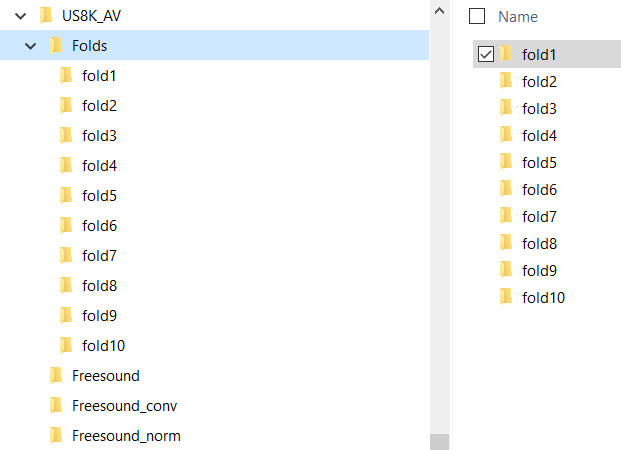

In [115]:
sound_files

[['107367_1.wav',
  '107367_10.wav',
  '107367_11.wav',
  '107367_12.wav',
  '107367_13.wav',
  '107367_14.wav',
  '107367_15.wav',
  '107367_16.wav',
  '107367_17.wav',
  '107367_18.wav',
  '107367_19.wav',
  '107367_2.wav',
  '107367_20.wav',
  '107367_3.wav',
  '107367_4.wav',
  '107367_5.wav',
  '107367_6.wav',
  '107367_7.wav',
  '107367_8.wav',
  '107367_9.wav',
  '170017_1.wav',
  '170017_10.wav',
  '170017_11.wav',
  '170017_12.wav',
  '170017_13.wav',
  '170017_14.wav',
  '170017_15.wav',
  '170017_16.wav',
  '170017_17.wav',
  '170017_18.wav',
  '170017_19.wav',
  '170017_2.wav',
  '170017_20.wav',
  '170017_3.wav',
  '170017_4.wav',
  '170017_5.wav',
  '170017_6.wav',
  '170017_7.wav',
  '170017_8.wav',
  '170017_9.wav',
  '254197_1.wav',
  '254197_2.wav',
  '254197_3.wav',
  '254197_4.wav',
  '254197_5.wav',
  '254197_6.wav',
  '254197_7.wav',
  '254197_8.wav'],
 ['655896_1.wav',
  '655896_10.wav',
  '655896_11.wav',
  '655896_12.wav',
  '655896_13.wav',
  '655896_14.wav',


In [116]:
flattened_list = [item for sublist in sound_files for item in sublist]
flattened_list

['107367_1.wav',
 '107367_10.wav',
 '107367_11.wav',
 '107367_12.wav',
 '107367_13.wav',
 '107367_14.wav',
 '107367_15.wav',
 '107367_16.wav',
 '107367_17.wav',
 '107367_18.wav',
 '107367_19.wav',
 '107367_2.wav',
 '107367_20.wav',
 '107367_3.wav',
 '107367_4.wav',
 '107367_5.wav',
 '107367_6.wav',
 '107367_7.wav',
 '107367_8.wav',
 '107367_9.wav',
 '170017_1.wav',
 '170017_10.wav',
 '170017_11.wav',
 '170017_12.wav',
 '170017_13.wav',
 '170017_14.wav',
 '170017_15.wav',
 '170017_16.wav',
 '170017_17.wav',
 '170017_18.wav',
 '170017_19.wav',
 '170017_2.wav',
 '170017_20.wav',
 '170017_3.wav',
 '170017_4.wav',
 '170017_5.wav',
 '170017_6.wav',
 '170017_7.wav',
 '170017_8.wav',
 '170017_9.wav',
 '254197_1.wav',
 '254197_2.wav',
 '254197_3.wav',
 '254197_4.wav',
 '254197_5.wav',
 '254197_6.wav',
 '254197_7.wav',
 '254197_8.wav',
 '655896_1.wav',
 '655896_10.wav',
 '655896_11.wav',
 '655896_12.wav',
 '655896_13.wav',
 '655896_14.wav',
 '655896_15.wav',
 '655896_16.wav',
 '655896_17.wav',
 

In [117]:
print(f'Number of files in the folders..: {len(flattened_list)} ({(len(flattened_list)*4)/3600}h)')

Number of files in the folders..: 550 (0.6111111111111112h)


In [118]:
df

,Fold,Folder_name,Class_categorical,File_name,Path
0,1,fold1,silence,107367_1.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold1\107367_1.wav
1,1,fold1,silence,107367_10.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold1\107367_10.wav
2,1,fold1,silence,107367_11.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold1\107367_11.wav
3,1,fold1,silence,107367_12.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold1\107367_12.wav
4,1,fold1,silence,107367_13.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold1\107367_13.wav
...,...,...,...,...,...
545,9,fold9,silence,708192_10.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_10.wav
546,9,fold9,silence,708192_11.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_11.wav
547,9,fold9,silence,708192_12.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_12.wav
548,9,fold9,silence,708192_8.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_8.wav


In [119]:
# Read the csv file created 

db_silence = pd.read_csv(os.path.join(path_US8K_AV, 'US8K_AV_silence.csv'), dtype={'Fold': str})
db_silence = db_silence.drop('Unnamed: 0', axis=1)

In [120]:
db_silence

,Fold,Folder_name,Class_categorical,File_name,Path
0,1,fold1,silence,107367_1.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold1\107367_1.wav
1,1,fold1,silence,107367_10.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold1\107367_10.wav
2,1,fold1,silence,107367_11.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold1\107367_11.wav
3,1,fold1,silence,107367_12.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold1\107367_12.wav
4,1,fold1,silence,107367_13.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold1\107367_13.wav
...,...,...,...,...,...
545,9,fold9,silence,708192_10.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_10.wav
546,9,fold9,silence,708192_11.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_11.wav
547,9,fold9,silence,708192_12.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_12.wav
548,9,fold9,silence,708192_8.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_8.wav


In [121]:
# Read the csv file created for the US8K_AV with no silence audios

db_US8K_AV = pd.read_csv(os.path.join(path_US8K_AV, 'US8K_AV_no_silence.csv'), dtype={'Fold': str})
db_US8K_AV = db_US8K_AV.drop('Unnamed: 0', axis=1)

In [122]:
db_US8K_AV

,Fold,Folder_name,Class_OHEV,Class_categorical,File_name,Path,classID,fsID,start,end,salience
0,5,fold5,"[0, 0, 0, 1, 0]",dog_bark,100032-3-0-0.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100032-3-0-0.wav,3,100032,0.000000,0.317551,1
1,5,fold5,"[0, 0, 1, 0, 0]",children_playing,100263-2-0-117.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-117.wav,2,100263,58.500000,62.500000,1
2,5,fold5,"[0, 0, 1, 0, 0]",children_playing,100263-2-0-121.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-121.wav,2,100263,60.500000,64.500000,1
3,5,fold5,"[0, 0, 1, 0, 0]",children_playing,100263-2-0-126.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-126.wav,2,100263,63.000000,67.000000,1
4,5,fold5,"[0, 0, 1, 0, 0]",children_playing,100263-2-0-137.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-137.wav,2,100263,68.500000,72.500000,1
...,...,...,...,...,...,...,...,...,...,...,...
4353,7,fold7,"[0, 1, 0, 0, 0]",car_horn,99812-1-2-0.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold7\99812-1-2-0.wav,1,99812,159.522205,163.522205,2
4354,7,fold7,"[0, 1, 0, 0, 0]",car_horn,99812-1-3-0.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold7\99812-1-3-0.wav,1,99812,181.142431,183.284976,2
4355,7,fold7,"[0, 1, 0, 0, 0]",car_horn,99812-1-4-0.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold7\99812-1-4-0.wav,1,99812,242.691902,246.197885,2
4356,7,fold7,"[0, 1, 0, 0, 0]",car_horn,99812-1-5-0.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold7\99812-1-5-0.wav,1,99812,253.209850,255.741948,2


In [123]:
db_US8K_AV = db_US8K_AV[['Fold', 'Folder_name', 'Class_categorical', 'File_name', 'Path']]
db_US8K_AV

,Fold,Folder_name,Class_categorical,File_name,Path
0,5,fold5,dog_bark,100032-3-0-0.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100032-3-0-0.wav
1,5,fold5,children_playing,100263-2-0-117.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-117.wav
2,5,fold5,children_playing,100263-2-0-121.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-121.wav
3,5,fold5,children_playing,100263-2-0-126.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-126.wav
4,5,fold5,children_playing,100263-2-0-137.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-137.wav
...,...,...,...,...,...
4353,7,fold7,car_horn,99812-1-2-0.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold7\99812-1-2-0.wav
4354,7,fold7,car_horn,99812-1-3-0.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold7\99812-1-3-0.wav
4355,7,fold7,car_horn,99812-1-4-0.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold7\99812-1-4-0.wav
4356,7,fold7,car_horn,99812-1-5-0.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold7\99812-1-5-0.wav


In [124]:
merged_db = pd.merge(db_US8K_AV, db_silence, how='outer') 

In [125]:
merged_db

,Fold,Folder_name,Class_categorical,File_name,Path
0,5,fold5,dog_bark,100032-3-0-0.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100032-3-0-0.wav
1,5,fold5,children_playing,100263-2-0-117.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-117.wav
2,5,fold5,children_playing,100263-2-0-121.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-121.wav
3,5,fold5,children_playing,100263-2-0-126.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-126.wav
4,5,fold5,children_playing,100263-2-0-137.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-137.wav
...,...,...,...,...,...
4903,9,fold9,silence,708192_10.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_10.wav
4904,9,fold9,silence,708192_11.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_11.wav
4905,9,fold9,silence,708192_12.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_12.wav
4906,9,fold9,silence,708192_8.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_8.wav


In [126]:
# Save the dataframe as CSV

merged_db.to_csv(os.path.join(path_US8K_AV, csv_file))

In [127]:
# Read the csv file created 

db = pd.read_csv(os.path.join(path_US8K_AV, csv_file), dtype={'Fold': str})
db = db.drop('Unnamed: 0', axis=1)

In [128]:
db

,Fold,Folder_name,Class_categorical,File_name,Path
0,5,fold5,dog_bark,100032-3-0-0.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100032-3-0-0.wav
1,5,fold5,children_playing,100263-2-0-117.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-117.wav
2,5,fold5,children_playing,100263-2-0-121.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-121.wav
3,5,fold5,children_playing,100263-2-0-126.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-126.wav
4,5,fold5,children_playing,100263-2-0-137.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-137.wav
...,...,...,...,...,...
4903,9,fold9,silence,708192_10.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_10.wav
4904,9,fold9,silence,708192_11.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_11.wav
4905,9,fold9,silence,708192_12.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_12.wav
4906,9,fold9,silence,708192_8.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_8.wav


In [129]:
y = db['Class_categorical'].values
len(y)

4908

In [130]:
print(np.unique(y))
print(len(np.unique(y)))

['background' 'car_horn' 'children_playing' 'dog_bark' 'silence' 'siren']
6


In [131]:
# Method to create an one hot encoder vector (OHEV)

def OHEV(df: list, cat_class: str):
    
    df_class  = df[cat_class]
    
    return np.array(pd.get_dummies(df_class, columns = [str], dtype=int))

In [132]:
# Creates a OHEV for the audio classes

class_enc = OHEV(db, 'Class_categorical')
db.insert(loc = 2, column = 'Class_OHEV', value = class_enc.tolist())

In [133]:
db

,Fold,Folder_name,Class_OHEV,Class_categorical,File_name,Path
0,5,fold5,"[0, 0, 0, 1, 0, 0]",dog_bark,100032-3-0-0.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100032-3-0-0.wav
1,5,fold5,"[0, 0, 1, 0, 0, 0]",children_playing,100263-2-0-117.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-117.wav
2,5,fold5,"[0, 0, 1, 0, 0, 0]",children_playing,100263-2-0-121.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-121.wav
3,5,fold5,"[0, 0, 1, 0, 0, 0]",children_playing,100263-2-0-126.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-126.wav
4,5,fold5,"[0, 0, 1, 0, 0, 0]",children_playing,100263-2-0-137.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-137.wav
...,...,...,...,...,...,...
4903,9,fold9,"[0, 0, 0, 0, 1, 0]",silence,708192_10.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_10.wav
4904,9,fold9,"[0, 0, 0, 0, 1, 0]",silence,708192_11.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_11.wav
4905,9,fold9,"[0, 0, 0, 0, 1, 0]",silence,708192_12.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_12.wav
4906,9,fold9,"[0, 0, 0, 0, 1, 0]",silence,708192_8.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_8.wav


In [134]:
def get_next_file_number(folder: str):
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.startswith(pic_first_name)]
    if not files:
        return 1
    else:
        numbers = [int(f.split('.')[0].split('_')[-1]) for f in files]
        return max(numbers) + 1

In [135]:
print(get_next_file_number(path_pic))

7


In [136]:
file_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'
file_name

'03_New_dataset_US8K_AV_silence_audio_07.png'

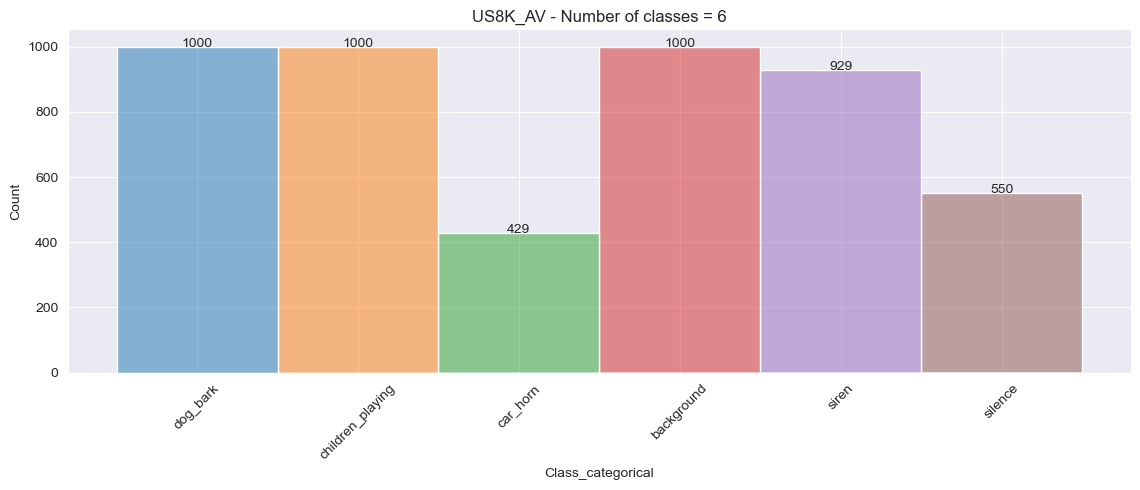

In [137]:
# Analysis of the class balancing

picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

sns.set_style("darkgrid")
gTitle = nom_dataset + ' - Number of classes = ' + str(len(pd.Series(db['Class_categorical']).unique()))
g = sns.displot(db,x='Class_categorical', hue='Class_categorical',height = 5, aspect = 2).set(title=gTitle)
g.set_xticklabels(rotation=45)
g.set_titles('Number of classes')

# Retrieve the axes object from the plot
axes = g.ax

# Iterate over each bar in the plot
for p in axes.patches:
    # Get the coordinates of the bar
    width = p.get_width()
    height = p.get_height()
    cord_x, cord_y = p.get_xy()
    if height > 0:
        axes.annotate(f'{height}', (cord_x + width/2, cord_y + height), ha='center')
        
g._legend.remove()

plt.tight_layout()
plt.savefig(os.path.join(path_pic, picture_name))
plt.show()

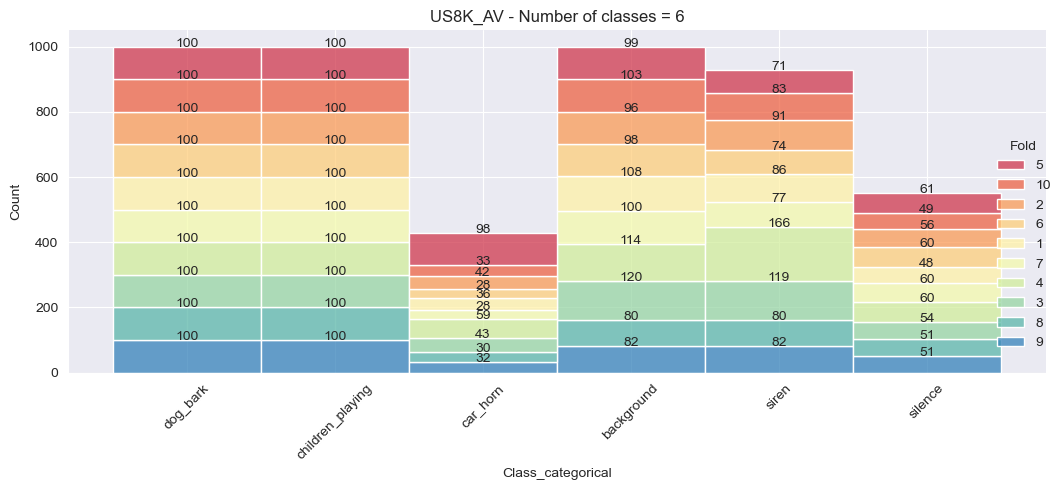

In [138]:
# Analysis of the class balancing

picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

sns.set_style("darkgrid")
gTitle = 'US8K_AV - Number of classes = ' + str(len(pd.Series(db['Class_categorical']).unique()))
g = sns.displot(db, x='Class_categorical', hue='Fold',height = 5, aspect = 2, multiple='stack', palette='Spectral').set(title=gTitle)
g.set_xticklabels(rotation=45)
g.set_titles('Number of classes')

# Retrieve the axes object from the plot
axes = g.ax

# Iterate over each bar in the plot
for p in axes.patches:
    # Get the coordinates of the bar
    width = p.get_width()
    height = int(p.get_height())
    cord_x, cord_y = p.get_xy()
    if height > 0:
        axes.annotate(f'{height}', (cord_x + width/2, cord_y + height), ha='center')
        
#g._legend.remove()

plt.tight_layout()
plt.savefig(os.path.join(path_pic, picture_name))

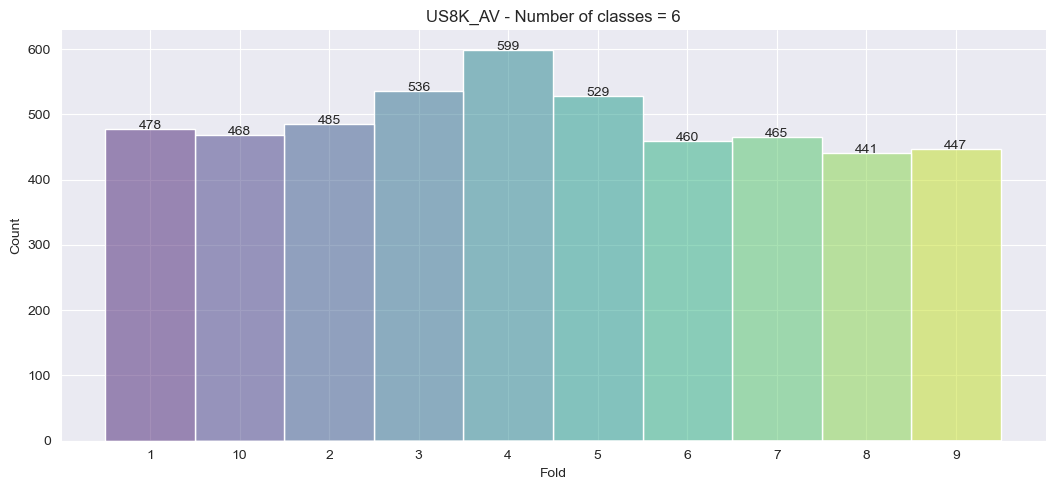

In [139]:
# Analysis of the class balancing

picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

sns.set_style("darkgrid")
gTitle = 'US8K_AV - Number of classes = ' + str(len(pd.Series(db['Class_categorical']).unique()))
db_sorted = db.sort_values('Fold')
g = sns.displot(db_sorted, x='Fold', hue='Fold', height = 5, aspect = 2, palette='viridis').set(title=gTitle)
g.set_xticklabels(rotation=0)
g.set_titles('Number of classes')

# Retrieve the axes object from the plot
axes = g.ax

# Iterate over each bar in the plot
for p in axes.patches:
    # Get the coordinates of the bar
    width = p.get_width()
    height = p.get_height()
    cord_x, cord_y = p.get_xy()
    if height > 0:
        axes.annotate(f'{height}', (cord_x + width/2, cord_y + height), ha='center')
        
g._legend.remove()

plt.tight_layout()
plt.savefig(os.path.join(path_pic, picture_name))

In [141]:
db.to_csv(os.path.join(path_US8K_AV, csv_file))

In [142]:
del db

In [144]:
# Read the csv file created 

db = pd.read_csv(os.path.join(path_US8K_AV, csv_file), dtype={'Fold': str})
db = db.drop('Unnamed: 0', axis=1)

In [145]:
db

,Fold,Folder_name,Class_OHEV,Class_categorical,File_name,Path
0,5,fold5,"[0, 0, 0, 1, 0, 0]",dog_bark,100032-3-0-0.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100032-3-0-0.wav
1,5,fold5,"[0, 0, 1, 0, 0, 0]",children_playing,100263-2-0-117.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-117.wav
2,5,fold5,"[0, 0, 1, 0, 0, 0]",children_playing,100263-2-0-121.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-121.wav
3,5,fold5,"[0, 0, 1, 0, 0, 0]",children_playing,100263-2-0-126.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-126.wav
4,5,fold5,"[0, 0, 1, 0, 0, 0]",children_playing,100263-2-0-137.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-137.wav
...,...,...,...,...,...,...
4903,9,fold9,"[0, 0, 0, 0, 1, 0]",silence,708192_10.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_10.wav
4904,9,fold9,"[0, 0, 0, 0, 1, 0]",silence,708192_11.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_11.wav
4905,9,fold9,"[0, 0, 0, 0, 1, 0]",silence,708192_12.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_12.wav
4906,9,fold9,"[0, 0, 0, 0, 1, 0]",silence,708192_8.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_8.wav


In [146]:
from MT_audioPP import audioPP
from MT_feature_extractor import feature_extractor

### Features ORIGINAL

* *aug*       = False
* *windowing* = False

In [44]:
# Remove silence samples, augment and normalize (windowed) the audio files

audioPP_output = audioPP(db['Path'].values,
                         db['Class_categorical'].values, 
                         db['Class_OHEV'].values,
                         db['Fold'].values,
                         time_length = time_length,
                         threshold = threshold,
                         aug = False,
                         windowing = False,
                         frames = frames)
    
X, y_string, y_OHEV, folds  = audioPP_output.audio_windowed, audioPP_output.labels_cat_wind, audioPP_output.labels_cod_wind, audioPP_output.labels_fold_wind

100%|█████████████████████████████████████████████████████████████████████████████| 4908/4908 [00:21<00:00, 226.82it/s]
4908it [00:39, 123.57it/s]


Shape of the audio data..................: (4908, 88200)
Shape of the categorical label data......: (4908,)
Shape of the one hot encoder label data..: (4908,)
Shape of the fold data...................: (4908,)


In [45]:
#y_OHEV = np.array([np.array(sublist).astype(np.int32) for sublist in y_OHEV])

In [46]:
#y_OHEV = [np.array(eval(s)) for s in y_OHEV]

In [47]:
db_aug = pd.DataFrame({'Audio' : X, 'Class_categorical' : y_string, 'Class_OHEV' : y_OHEV, 'Fold' : folds})
db_aug[['Fold']] = db_aug[['Fold']].astype('str')
db_aug

,Audio,Class_categorical,Class_OHEV,Fold
0,"[-0.0034710653, -0.0050192624, -0.004654482, -0.0049833283, -0.0038681468, -0.0023575649, -0.00025486574, 0.00135406...",dog_bark,"[0, 0, 0, 1, 0, 0]",5
1,"[0.0027405696, 0.0036386526, 0.0023064336, 0.0023546093, 0.0025339962, 0.0030277965, 0.0027998006, 0.0028241847, 0.0...",children_playing,"[0, 0, 1, 0, 0, 0]",5
2,"[-0.0027212622, -0.0030217567, -0.0016039186, -0.0012952066, -0.001044448, -0.0011087725, -0.0006573542, -0.00120615...",children_playing,"[0, 0, 1, 0, 0, 0]",5
3,"[0.00015050662, -0.00023231667, -0.0013628466, -0.002236663, -0.0027237535, -0.002267104, -0.0012131947, -0.00148792...",children_playing,"[0, 0, 1, 0, 0, 0]",5
4,"[0.0012501464, 0.00428795, 0.0062407875, 0.0055125337, 0.003776363, 0.0018791268, 0.0014532767, 0.0026125484, 0.0038...",children_playing,"[0, 0, 1, 0, 0, 0]",5
...,...,...,...,...
4903,"[0.0020684754, 0.002996013, 0.0027406309, 0.0031264792, 0.0030979805, 0.0032640784, 0.0030700786, 0.0029712087, 0.00...",silence,"[0, 0, 0, 0, 1, 0]",9
4904,"[-0.00054763607, -0.0006439837, -0.0003565054, -0.00026786933, -0.00012919167, -0.0002218535, -0.00025803095, -0.000...",silence,"[0, 0, 0, 0, 1, 0]",9
4905,"[0.00036112632, 0.0003222265, -2.3932662e-05, -0.00028421593, -0.0005354925, -0.0005733533, -0.00046778092, -0.00020...",silence,"[0, 0, 0, 0, 1, 0]",9
4906,"[-0.0002325126, -0.00035913184, -0.00025248923, -0.0001690893, 1.3734563e-05, 0.00021053397, 0.0003744613, 0.0003582...",silence,"[0, 0, 0, 0, 1, 0]",9


In [48]:
# Convert the OHEV to int32
db_aug['Class_OHEV'] = db_aug['Class_OHEV'].apply(lambda x: np.array(x, dtype=np.int32))

In [49]:
print(type(db_aug['Class_OHEV'][0]))
print(type(db_aug['Class_OHEV'][0][0]))

<class 'numpy.ndarray'>
<class 'numpy.int32'>


In [50]:
pkl_features

'US8K_AV_features_original.pkl'

In [51]:
dog_aug = db_aug[db_aug['Class_categorical'] == 'dog_bark']
dog_aug

,Audio,Class_categorical,Class_OHEV,Fold
0,"[-0.0034710653, -0.0050192624, -0.004654482, -0.0049833283, -0.0038681468, -0.0023575649, -0.00025486574, 0.00135406...",dog_bark,"[0, 0, 0, 1, 0, 0]",5
14,"[0.00016530929, 8.096441e-05, 0.00010344596, 9.4123185e-05, -1.7766375e-05, 3.42282e-05, 0.00016252033, 0.0001439824...",dog_bark,"[0, 0, 0, 1, 0, 0]",2
15,"[-0.0549016, -0.0030997097, 0.065438926, 0.066826925, 0.048625134, 0.00593441, 0.004272476, 0.033853546, 0.082438916...",dog_bark,"[0, 0, 0, 1, 0, 0]",2
16,"[-0.0013541959, -0.0017534851, -0.00066222204, -0.00073858444, -0.0018295386, -0.005036477, -0.007678789, -0.0046168...",dog_bark,"[0, 0, 0, 1, 0, 0]",2
17,"[-0.0021209174, -0.002075204, -0.00092535943, 0.00043941697, 0.004049227, 0.0050487723, 0.009374658, 0.009497762, 0....",dog_bark,"[0, 0, 0, 1, 0, 0]",2
...,...,...,...,...
4295,"[0.12224058, 0.28320754, 0.36700976, 0.47181457, 0.57441556, 0.64737153, 0.6197049, 0.5389351, 0.48762226, 0.4169649...",dog_bark,"[0, 0, 0, 1, 0, 0]",2
4296,"[-0.00022791978, -0.0012669582, -0.001694646, -0.0006031464, -0.0002898702, -0.00018023362, 0.00047345774, -0.000497...",dog_bark,"[0, 0, 0, 1, 0, 0]",2
4312,"[-0.00047976524, -0.00039484072, -0.00035502762, -0.00034532882, -0.0002325438, -0.00013316981, -9.567477e-06, -8.69...",dog_bark,"[0, 0, 0, 1, 0, 0]",6
4314,"[0.0028073888, 0.0015513706, -0.000205094, 0.0066186707, 0.005362046, 0.007070095, 0.009689612, 0.007504809, 0.01082...",dog_bark,"[0, 0, 0, 1, 0, 0]",10


In [52]:
for fold in np.unique(db_aug['Fold']):
    print(f"Validation fold: {fold}")
    
    valsize = len(db_aug[db_aug['Fold'] == fold])
    trnsize = len(db_aug[db_aug['Fold'] != fold])
    print(f'dbComplete_VAL size: {valsize}')
    print(f'dbComplete_TRN size: {trnsize}')
    print()

Validation fold: 1
dbComplete_VAL size: 478
dbComplete_TRN size: 4430

Validation fold: 10
dbComplete_VAL size: 468
dbComplete_TRN size: 4440

Validation fold: 2
dbComplete_VAL size: 485
dbComplete_TRN size: 4423

Validation fold: 3
dbComplete_VAL size: 536
dbComplete_TRN size: 4372

Validation fold: 4
dbComplete_VAL size: 599
dbComplete_TRN size: 4309

Validation fold: 5
dbComplete_VAL size: 529
dbComplete_TRN size: 4379

Validation fold: 6
dbComplete_VAL size: 460
dbComplete_TRN size: 4448

Validation fold: 7
dbComplete_VAL size: 465
dbComplete_TRN size: 4443

Validation fold: 8
dbComplete_VAL size: 441
dbComplete_TRN size: 4467

Validation fold: 9
dbComplete_VAL size: 447
dbComplete_TRN size: 4461



In [53]:
random_idx = random.choice(dog_aug.index.tolist())
random_sample = dog_aug['Audio'][random_idx]
print(f'Dataframe index....: {random_idx}')
print(f'Sample file name...: {random_sample}')

Dataframe index....: 890
Sample file name...: [ 0.0047777   0.00839611  0.00851949 ...  0.00077918 -0.00165126
 -0.00185492]


In [54]:
ipd.Audio(random_sample, rate = SR)

In [55]:
# Extract 375 features from the audio files (long process, strongly dependent on audio duration and its agumentation)

# Check if the pkl file exists, if not, create it
if not os.path.exists(os.path.join(path_models, pkl_features)):
    Ft_extractor = feature_extractor(db_aug)
    DB_original  = Ft_extractor.DB_aug
    
    # Check for NaN values in the entire DataFrame
    has_nan_columnwise = DB_original.isna().any(axis=0)

    # Print columns with NaN values
    print("Columns with NaN values:")
    print(has_nan_columnwise[has_nan_columnwise])
    
    DB_original.fillna(0, inplace=True)

    # Save the features to a pickle file (~1,514GB)
    DB_original.to_pickle(os.path.join(path_models, pkl_features))
    
    # Read the features from the pickle file
    DB_ori_from_pkl = pd.read_pickle(os.path.join(path_models, pkl_features))

# If exist, read the pkl file with the features extracted
else:
    DB_ori_from_pkl = pd.read_pickle(os.path.join(path_models, pkl_features))

100%|██████████████████████████████████████████████████████████████████████████████| 4908/4908 [49:46<00:00,  1.64it/s]


Columns with NaN values:
CHROMA_skew_1         True
CHROMA_kurtosis_1     True
CHROMA_skew_3         True
CHROMA_kurtosis_3     True
CHROMA_skew_4         True
CHROMA_kurtosis_4     True
CHROMA_skew_5         True
CHROMA_kurtosis_5     True
CHROMA_skew_6         True
CHROMA_kurtosis_6     True
CHROMA_skew_7         True
CHROMA_kurtosis_7     True
CHROMA_skew_8         True
CHROMA_kurtosis_8     True
CHROMA_skew_9         True
CHROMA_kurtosis_9     True
CHROMA_skew_10        True
CHROMA_kurtosis_10    True
CHROMA_skew_11        True
CHROMA_kurtosis_11    True
CHROMA_skew_12        True
CHROMA_kurtosis_12    True
dtype: bool


In [56]:
DB_ori_from_pkl

,Audio,Class_categorical,Class_OHEV,Fold,RMSE,ZCR,CENTROIDS,BANDWIDTH,ROLLOFF,MEL_1,...,TONNETZ_5,TONNETZ_std_5,TONNETZ_median_5,TONNETZ_skew_5,TONNETZ_kurtosis_5,TONNETZ_6,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
0,"[-0.0034710653, -0.0050192624, -0.004654482, -0.0049833283, -0.0038681468, -0.0023575649, -0.00025486574, 0.00135406...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,0.121009,0.133490,2094.968187,1745.096817,2886.196035,0.000025,...,-0.023313,0.029888,-0.018669,-0.298720,-0.579663,-0.046785,0.024244,-0.049756,0.759231,-0.024962
1,"[0.0027405696, 0.0036386526, 0.0023064336, 0.0023546093, 0.0025339962, 0.0030277965, 0.0027998006, 0.0028241847, 0.0...",children_playing,"[0, 0, 1, 0, 0, 0]",5,0.003977,0.139174,2137.808989,1971.446838,3996.089516,0.049608,...,0.001509,0.028921,0.010987,-0.622719,-0.490121,-0.017096,0.018670,-0.018241,0.275013,-0.497943
2,"[-0.0027212622, -0.0030217567, -0.0016039186, -0.0012952066, -0.001044448, -0.0011087725, -0.0006573542, -0.00120615...",children_playing,"[0, 0, 1, 0, 0, 0]",5,0.002999,0.102104,1846.767527,1950.695683,3695.993836,0.030884,...,0.007425,0.019891,0.009606,-0.389803,-0.653482,0.007211,0.018733,0.009139,-0.205466,-0.212879
3,"[0.00015050662, -0.00023231667, -0.0013628466, -0.002236663, -0.0027237535, -0.002267104, -0.0012131947, -0.00148792...",children_playing,"[0, 0, 1, 0, 0, 0]",5,0.004600,0.131091,2301.066813,2262.904380,4502.928841,0.026433,...,0.006321,0.022683,0.005562,-0.095897,-0.191906,0.003914,0.027117,0.007208,-0.769827,0.623153
4,"[0.0012501464, 0.00428795, 0.0062407875, 0.0055125337, 0.003776363, 0.0018791268, 0.0014532767, 0.0026125484, 0.0038...",children_playing,"[0, 0, 1, 0, 0, 0]",5,0.003212,0.118249,2004.947175,1951.244545,3927.071244,0.061382,...,0.026935,0.014072,0.026896,-0.069859,-0.269259,0.054360,0.025776,0.050245,0.208739,-1.062755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,"[0.0020684754, 0.002996013, 0.0027406309, 0.0031264792, 0.0030979805, 0.0032640784, 0.0030700786, 0.0029712087, 0.00...",silence,"[0, 0, 0, 0, 1, 0]",9,0.002076,0.028213,820.488065,1184.603078,1772.692942,0.040285,...,-0.029737,0.017842,-0.029812,-0.007542,-0.639852,-0.001692,0.046910,-0.014152,1.014088,0.288518
4904,"[-0.00054763607, -0.0006439837, -0.0003565054, -0.00026786933, -0.00012919167, -0.0002218535, -0.00025803095, -0.000...",silence,"[0, 0, 0, 0, 1, 0]",9,0.002086,0.024804,834.992132,1219.662313,1838.226071,0.038271,...,-0.022788,0.032338,-0.029925,0.360814,-1.095916,-0.009712,0.048725,0.003801,-0.290986,-1.009455
4905,"[0.00036112632, 0.0003222265, -2.3932662e-05, -0.00028421593, -0.0005354925, -0.0005733533, -0.00046778092, -0.00020...",silence,"[0, 0, 0, 0, 1, 0]",9,0.002231,0.026999,830.400408,1207.721206,1818.684378,0.027518,...,-0.022304,0.034789,-0.024872,0.233812,-0.885585,-0.038786,0.032608,-0.043836,1.350900,2.272794
4906,"[-0.0002325126, -0.00035913184, -0.00025248923, -0.0001690893, 1.3734563e-05, 0.00021053397, 0.0003744613, 0.0003582...",silence,"[0, 0, 0, 0, 1, 0]",9,0.001796,0.029929,874.287541,1251.274937,1879.425437,0.027717,...,0.004090,0.039655,0.005350,-0.224015,-0.907215,-0.006778,0.026508,-0.003402,-0.001074,-0.871445


In [57]:
print(type(DB_ori_from_pkl['Fold'][0]))
print(type(DB_ori_from_pkl['Class_OHEV'][0][0]))
print(type(DB_ori_from_pkl['Class_OHEV'][0]))

<class 'str'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>


In [58]:
print(len(DB_ori_from_pkl))

4908


In [59]:
DB_ori_from_pkl.shape

(4908, 379)

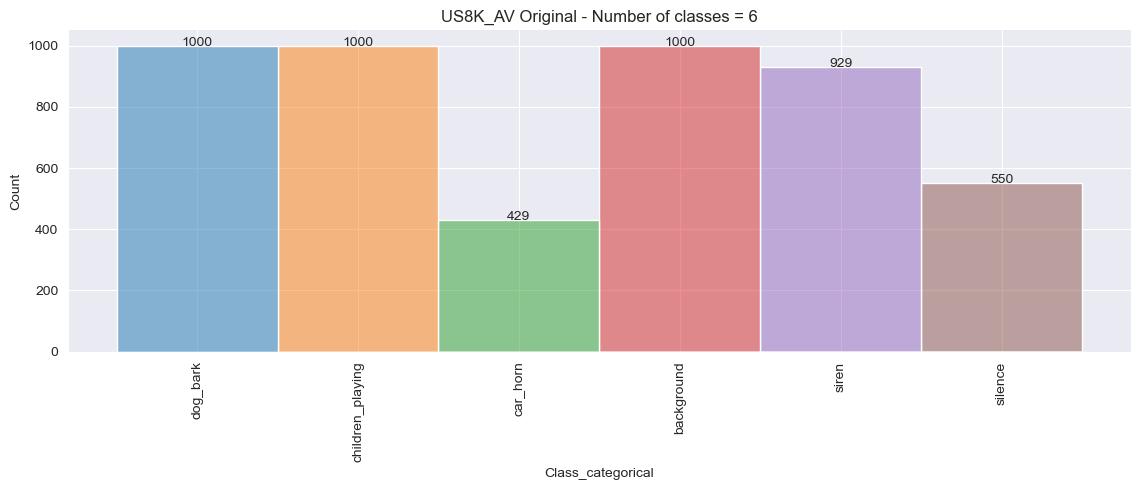

In [60]:
# Analysis of the class balancing

sns.set_style("darkgrid")
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'
gTitle = nom_dataset + ' Original - Number of classes = ' + str(len(pd.Series(DB_ori_from_pkl['Class_categorical']).unique()))
g = sns.displot(DB_ori_from_pkl, x='Class_categorical', hue='Class_categorical',height = 5, aspect = 2).set(title=gTitle)
g.set_xticklabels(rotation=90)
g.set_titles('Number of classes')

# Retrieve the axes object from the plot
axes = g.ax

# Iterate over each bar in the plot
for p in axes.patches:
    # Get the coordinates of the bar
    width = p.get_width()
    height = p.get_height()
    cord_x, cord_y = p.get_xy()
    if height > 0:
        axes.annotate(f'{height}', (cord_x + width/2, cord_y + height), ha='center')
        
g._legend.remove()

plt.tight_layout()
plt.savefig(os.path.join(path_pic, picture_name))

### Features AUGMENTED

* *aug*       = True
* *windowing* = False

Dataset will be 6x larger (original + time stretching .85 / 1.15, pitch shifting -4 / +4 semitons, and time shifting randomly)

ATTENTION: you may need to split this process in more than 2 steps due memory allocation constrains

In [61]:
for i in range(2):
    subset_db = db[int(i*len(db)/2):int((i+1)*len(db)/2)]

    audioPP_output = audioPP(subset_db['Path'].values,
                             subset_db['Class_categorical'].values, 
                             subset_db['Class_OHEV'].values,
                             subset_db['Fold'].values,
                             time_length = time_length,
                             threshold = threshold,
                             aug = True,
                             windowing = False,
                             frames = frames)

    X, y_string, y_OHEV, folds  = audioPP_output.audio_windowed, audioPP_output.labels_cat_wind, audioPP_output.labels_cod_wind, audioPP_output.labels_fold_wind

    # Delete the subsets to clear memory
    del subset_db 

    # Parse every OHEV list as numpy array of integers (int32)
    #y_OHEV = [np.array(eval(s)) for s in y_OHEV]

    db_aug = pd.DataFrame({'Audio' : X, 'Class_categorical' : y_string, 'Class_OHEV' : y_OHEV, 'Fold' : folds})
    db_aug[['Fold']] = db_aug[['Fold']].astype('str')

    del X, y_string, y_OHEV, folds # Delete to clear memory

    # Save db_aug as a pickle file
    with open(os.path.join(path_models, f'db_aug_{i+1}.pkl'), 'wb') as f:
        pickle.dump(db_aug, f)

    del db_aug  # Delete db_aug to clear memory

# Read and join both db_aug_1 and db_aug_2 into db_aug
with open(os.path.join(path_models,'db_aug_1.pkl'), 'rb') as f:
    db_aug_1 = pickle.load(f)

with open(os.path.join(path_models,'db_aug_2.pkl'), 'rb') as f:
    db_aug_2 = pickle.load(f)

db_aug = pd.concat([db_aug_1, db_aug_2], ignore_index=True)

del db_aug_1, db_aug_2
os.remove(os.path.join(path_models,'db_aug_1.pkl'))
os.remove(os.path.join(path_models,'db_aug_2.pkl'))

100%|██████████████████████████████████████████████████████████████████████████████| 2454/2454 [05:34<00:00,  7.33it/s]
14724it [02:36, 93.83it/s] 


Shape of the audio data..................: (14724, 88200)
Shape of the categorical label data......: (14724,)
Shape of the one hot encoder label data..: (14724, 6)
Shape of the fold data...................: (14724,)


100%|██████████████████████████████████████████████████████████████████████████████| 2454/2454 [08:51<00:00,  4.61it/s]
14724it [03:13, 75.92it/s] 


Shape of the audio data..................: (14724, 88200)
Shape of the categorical label data......: (14724,)
Shape of the one hot encoder label data..: (14724, 6)
Shape of the fold data...................: (14724,)


In [62]:
# Convert the OHEV to int32
db_aug['Class_OHEV'] = db_aug['Class_OHEV'].apply(lambda x: np.array(x, dtype=np.int32))

In [63]:
print(type(db_aug['Fold'][0]))
print(type(db_aug['Class_OHEV'][0][0]))
print(type(db_aug['Class_OHEV'][0]))

<class 'str'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>


In [64]:
db_aug['Audio'][random_idx*6] # 6x

array([ 0.0047777 ,  0.00839611,  0.00851949, ...,  0.00077918,
       -0.00165126, -0.00185492], dtype=float32)

In [65]:
ipd.Audio(random_sample, rate = SR)

In [66]:
ipd.Audio(db_aug.at[random_idx*6 + 1, 'Audio'], rate = SR) # First augmentation of the original audio

In [67]:
librosa.get_duration(y = db_aug['Audio'][random_idx*6 + 1]) # 6x due augmentation to get the same sample as the original

4.0

In [68]:
pkl_aug_features

'US8K_AV_features_augmented_no_windowing.pkl'

In [69]:
# Extract 375 features from the audio files (long process, strongly dependent on audio duration and its agumentation)

# Check if the pkl file exists, if not, create it
if not os.path.exists(os.path.join(path_models, pkl_aug_features)):
    Ft_extractor = feature_extractor(db_aug)
    DB_augmented = Ft_extractor.DB_aug
    
    # Check for NaN values in the entire DataFrame
    has_nan_columnwise = DB_augmented.isna().any(axis=0)

    # Print columns with NaN values
    print("Columns with NaN values:")
    print(has_nan_columnwise[has_nan_columnwise])
    
    DB_augmented.fillna(0, inplace=True)
    
    # Save the features to a pickle file (~10,588GB)
    DB_augmented.to_pickle(os.path.join(path_models, pkl_aug_features))
    
    # Read the features from the pickle file
    DB_aug_from_pkl = pd.read_pickle(os.path.join(path_models, pkl_aug_features))

# If exist, read the pkl file with the features extracted
else:
    DB_aug_from_pkl = pd.read_pickle(os.path.join(path_models, pkl_aug_features))

100%|██████████████████████████████████████████████████████████████████████████| 29448/29448 [7:06:31<00:00,  1.15it/s]


Columns with NaN values:
CHROMA_skew_1         True
CHROMA_kurtosis_1     True
CHROMA_skew_2         True
CHROMA_kurtosis_2     True
CHROMA_skew_3         True
CHROMA_kurtosis_3     True
CHROMA_skew_4         True
CHROMA_kurtosis_4     True
CHROMA_skew_5         True
CHROMA_kurtosis_5     True
CHROMA_skew_6         True
CHROMA_kurtosis_6     True
CHROMA_skew_7         True
CHROMA_kurtosis_7     True
CHROMA_skew_8         True
CHROMA_kurtosis_8     True
CHROMA_skew_9         True
CHROMA_kurtosis_9     True
CHROMA_skew_10        True
CHROMA_kurtosis_10    True
CHROMA_skew_11        True
CHROMA_kurtosis_11    True
CHROMA_skew_12        True
CHROMA_kurtosis_12    True
dtype: bool


In [70]:
DB_aug_from_pkl

,Audio,Class_categorical,Class_OHEV,Fold,RMSE,ZCR,CENTROIDS,BANDWIDTH,ROLLOFF,MEL_1,...,TONNETZ_5,TONNETZ_std_5,TONNETZ_median_5,TONNETZ_skew_5,TONNETZ_kurtosis_5,TONNETZ_6,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
0,"[-0.0034710653, -0.0050192624, -0.004654482, -0.0049833283, -0.0038681468, -0.0023575649, -0.00025486574, 0.00135406...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,0.121009,0.133490,2094.968187,1745.096817,2886.196035,0.000025,...,-0.023313,0.029888,-0.018669,-0.298720,-0.579663,-0.046785,0.024244,-0.049756,0.759231,-0.024962
1,"[-0.06878060102462769, -0.07955734431743622, -0.06831151247024536, -0.01678953319787979, 0.04453383386135101, 0.1219...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,0.018368,0.290959,3088.870479,2292.692612,5039.951990,0.000649,...,-0.028420,0.021780,-0.024408,-0.620469,0.088506,-0.034441,0.026310,-0.040049,0.006524,-1.139639
2,"[-0.0035122973, -0.0050051752, -0.0045919046, -0.0048774146, -0.0037652655, -0.0022669514, -0.00015891435, 0.0014704...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,0.100775,0.133033,2106.590578,1777.133904,2892.543974,0.000016,...,-0.049970,0.031053,-0.057323,0.214288,-0.733329,-0.025334,0.031054,-0.028243,0.298586,-0.490271
3,"[-0.003488453, -0.004396054, -0.0037757251, -0.0042094756, -0.0030081559, -0.0015460963, 0.00081547524, 0.0026281716...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,0.113409,0.135708,2104.516302,1756.504203,2906.857952,0.000055,...,-0.017338,0.024289,-0.014603,-0.185764,-0.548766,0.000113,0.025748,-0.000898,-0.077263,-0.095841
4,"[-0.003237898, -0.0050192326, -0.0046117576, -0.004234772, -0.0019701908, 0.00027243508, 0.0026218973, 0.004221949, ...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,0.099378,0.171356,2391.238889,1600.176672,3377.165513,0.000008,...,-0.000741,0.026688,-0.001909,-0.054720,-0.604616,0.028016,0.027486,0.031821,-0.303592,0.219901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29443,"[-0.00012672941387911198, -0.00031067112901529725, 0.00037769022446324657, -0.0009935621503807308, -0.00088722864425...",silence,"[0, 0, 0, 0, 1, 0]",9,0.002083,0.047970,1084.590782,1338.278362,2306.915530,0.049907,...,0.009225,0.036871,0.007034,0.437267,-0.462702,0.001991,0.027833,-0.001339,0.313543,-0.243855
29444,"[0.0026603942, 0.0039245826, 0.0035142228, 0.0038491564, 0.0036104622, 0.0036268367, 0.0032049355, 0.0030404173, 0.0...",silence,"[0, 0, 0, 0, 1, 0]",9,0.001422,0.032836,921.067757,1263.630789,2029.348808,0.020707,...,0.000236,0.025634,0.001745,-0.341210,-0.672517,-0.012872,0.020392,-0.012396,-0.301014,0.615277
29445,"[0.0026129675, 0.003855708, 0.003475815, 0.0037853124, 0.0035560108, 0.0035760163, 0.0031735122, 0.003010428, 0.0027...",silence,"[0, 0, 0, 0, 1, 0]",9,0.001448,0.031747,914.864254,1273.398983,2021.569471,0.023395,...,-0.002403,0.032900,-0.006280,0.225873,-0.663987,0.004710,0.027290,-0.000766,0.396965,-0.319961
29446,"[0.002469795, 0.0039433176, 0.003568492, 0.0038429683, 0.0034739408, 0.0032530972, 0.0028426645, 0.0028493577, 0.002...",silence,"[0, 0, 0, 0, 1, 0]",9,0.001427,0.041089,1128.504437,1490.770313,2510.298501,0.017114,...,0.006793,0.017363,0.007045,0.108066,-0.910755,0.026398,0.030069,0.024746,0.303463,-0.394982


In [71]:
print(type(DB_aug_from_pkl['Fold'][0]))
print(type(DB_aug_from_pkl['Class_OHEV'][0][0]))
print(type(DB_aug_from_pkl['Class_OHEV'][0]))

<class 'str'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>


In [72]:
print(len(DB_aug_from_pkl))

29448


In [73]:
DB_aug_from_pkl.shape

(29448, 379)

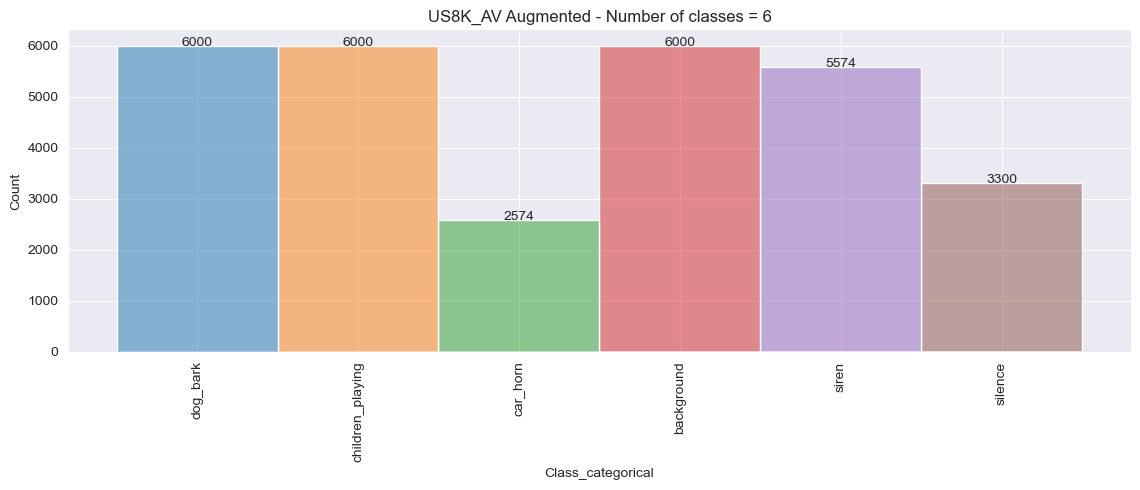

In [74]:
# Analysis of the class balancing

sns.set_style("darkgrid")
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'
gTitle = nom_dataset + ' Augmented - Number of classes = ' + str(len(pd.Series(DB_aug_from_pkl['Class_categorical']).unique()))
g = sns.displot(DB_aug_from_pkl, x='Class_categorical', hue='Class_categorical',height = 5, aspect = 2).set(title=gTitle)
g.set_xticklabels(rotation=90)
g.set_titles('Number of classes')

# Retrieve the axes object from the plot
axes = g.ax

# Iterate over each bar in the plot
for p in axes.patches:
    # Get the coordinates of the bar
    width = p.get_width()
    height = p.get_height()
    cord_x, cord_y = p.get_xy()
    if height > 0:
        axes.annotate(f'{height}', (cord_x + width/2, cord_y + height), ha='center')
        
g._legend.remove()

plt.tight_layout()
plt.savefig(os.path.join(path_pic, picture_name))

### Features AUGMENTED and WINDOWED

* *aug*       = False
* *windowing* = True

Dataset will have 4,908 * 7 = 34,356 samples.

ATTENTION: you may need to split this process due memory allocation constrains

In [75]:
# Clear the memory
del db_aug, DB_ori_from_pkl, DB_aug_from_pkl

In [76]:
# Remove silence samples, augment and normalize (windowed) the audio files

audioPP_output = audioPP(db['Path'].values,
                         db['Class_categorical'].values, 
                         db['Class_OHEV'].values,
                         db['Fold'].values,
                         time_length = time_length,
                         threshold = threshold,
                         aug = False,
                         windowing = True,
                         frames = frames)
    
X, y_string, y_OHEV, folds  = audioPP_output.audio_windowed, audioPP_output.labels_cat_wind, audioPP_output.labels_cod_wind, audioPP_output.labels_fold_wind

100%|██████████████████████████████████████████████████████████████████████████████| 4908/4908 [01:14<00:00, 65.93it/s]
4908it [02:25, 33.65it/s]
100%|███████████████████████████████████████████████████████████████████████████| 4908/4908 [00:00<00:00, 59932.41it/s]


Shape of the audio data..................: (34356, 22016)
Shape of the categorical label data......: (34356,)
Shape of the one hot encoder label data..: (34356, 6)
Shape of the fold data...................: (34356,)


In [77]:
db_aug = pd.DataFrame({'Audio' : X, 'Class_categorical' : y_string, 'Class_OHEV' : y_OHEV, 'Fold' : folds})
db_aug[['Fold']] = db_aug[['Fold']].astype('str')

In [78]:
# Convert the OHEV to int32
db_aug['Class_OHEV'] = db_aug['Class_OHEV'].apply(lambda x: np.array(x, dtype=np.int32))

In [79]:
print(type(db_aug['Fold'][0]))
print(type(db_aug['Class_OHEV'][0][0]))
print(type(db_aug['Class_OHEV'][0]))

<class 'str'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>


In [80]:
ipd.Audio(random_sample, rate = SR)

In [81]:
print(librosa.get_duration(y = db_aug.at[random_idx * 1 * 7, 'Audio']))
ipd.Audio(db_aug.at[random_idx * 1 * 7, 'Audio'], rate = SR)

0.9984580498866213


In [82]:
pkl_aug_wind_features

'US8K_AV_features_windowed.pkl'

In [91]:
# Extract 375 features from the audio files (long process, strongly dependent on audio duration and its agumentation)

# Check if the pkl file exists, if not, create it
if not os.path.exists(os.path.join(path_models, pkl_aug_wind_features)):
    Ft_extractor = feature_extractor(db_aug)
    DB_aug_wind  = Ft_extractor.DB_aug
    
    # Check for NaN values in the entire DataFrame
    has_nan_columnwise = DB_aug_wind.isna().any(axis=0)

    # Print columns with NaN values
    print("Columns with NaN values:")
    print(has_nan_columnwise[has_nan_columnwise])
    
    DB_aug_wind.fillna(0, inplace=True)
    
    # Save the features to a pickle file (~2,714GB)
    DB_aug_wind.to_pickle(os.path.join(path_models, pkl_aug_wind_features)) 
    
    # Read the features from the pickle file
    DB_aug_wind_from_pkl = pd.read_pickle(os.path.join(path_models, pkl_aug_wind_features))

# If exist, read the pkl file with the features extracted
else:
    DB_aug_wind_from_pkl = pd.read_pickle(os.path.join(path_models, pkl_aug_wind_features))

100%|█████████████████████████████████████████████████████████████████████████| 34356/34356 [10:08:09<00:00,  1.06s/it]


Columns with NaN values:
MFCC_skew_1           True
MFCC_kurtosis_1       True
MFCC_skew_2           True
MFCC_kurtosis_2       True
MFCC_skew_3           True
                      ... 
TONNETZ_kurtosis_4    True
TONNETZ_skew_5        True
TONNETZ_kurtosis_5    True
TONNETZ_skew_6        True
TONNETZ_kurtosis_6    True
Length: 76, dtype: bool


In [92]:
DB_aug_wind_from_pkl

,Audio,Class_categorical,Class_OHEV,Fold,RMSE,ZCR,CENTROIDS,BANDWIDTH,ROLLOFF,MEL_1,...,TONNETZ_5,TONNETZ_std_5,TONNETZ_median_5,TONNETZ_skew_5,TONNETZ_kurtosis_5,TONNETZ_6,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
0,"[-0.0034710653, -0.0050192624, -0.004654482, -0.0049833283, -0.0038681468, -0.0023575649, -0.00025486574, 0.00135406...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,0.117183,0.129483,2069.471399,1734.789901,2861.958452,0.000172,...,-0.027402,0.036064,-0.027793,-0.105702,-0.542892,-0.046177,0.025644,-0.046785,0.461191,-0.338882
1,"[-0.015428771, -0.0064468235, -0.002025701, -0.009768408, -0.020482529, -0.03246226, -0.046539657, -0.050950672, -0....",dog_bark,"[0, 0, 0, 1, 0, 0]",5,0.111724,0.131570,2098.418718,1743.608984,2885.449219,0.000047,...,-0.024680,0.026742,-0.021896,-0.009029,-0.613116,-0.026347,0.026433,-0.030688,0.414979,-0.840459
2,"[-0.17165461, -0.1961453, -0.2095497, -0.116395764, 0.02499168, 0.15181583, 0.2456393, 0.24304995, 0.1697193, 0.0706...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,0.124646,0.131459,2096.616414,1747.412264,2877.618963,0.000173,...,-0.022529,0.029269,-0.019908,-0.041418,-0.757713,-0.045096,0.023640,-0.045384,0.629947,0.096665
3,"[-0.004147315, -0.014180049, -0.016550057, -0.017083425, -0.010863152, -0.0018686495, 0.006234308, 0.00725661, 0.005...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,0.110741,0.131658,2093.378630,1736.615179,2873.214444,0.000026,...,-0.029242,0.026361,-0.024858,-0.293476,-0.509338,-0.020052,0.024617,-0.025407,0.554764,-0.364067
4,"[-0.047271818, -0.08598116, -0.08329079, -0.15244874, -0.21367016, -0.26584676, -0.19677721, -0.17195633, -0.0841544...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,0.125728,0.131836,2105.951159,1750.491381,2885.693914,0.000831,...,-0.027311,0.028995,-0.029214,-0.145633,-0.282959,-0.032483,0.024934,-0.036388,0.770805,0.232676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34351,"[-0.0013713251, -0.0009226998, -0.0006403711, -0.0005783211, -0.0006910372, -0.00091834716, -0.0010323625, -0.000976...",silence,"[0, 0, 0, 0, 1, 0]",9,0.002225,0.028387,920.881858,1319.656082,2078.932884,0.067512,...,0.003492,0.011031,0.003055,0.220017,-0.689318,-0.025411,0.013994,-0.018363,-0.710840,-0.875780
34352,"[0.0015545484, 0.001670274, 0.0018922735, 0.0021141772, 0.002221069, 0.002072654, 0.0018563501, 0.0018253133, 0.0019...",silence,"[0, 0, 0, 0, 1, 0]",9,0.002441,0.028187,882.948049,1265.997091,1975.426691,0.081268,...,0.003582,0.011518,0.008667,-1.235108,0.148265,-0.004595,0.010918,0.001000,-0.683456,-0.967157
34353,"[-0.0010607778, -0.0006731042, -0.00053357193, -0.0006793465, -0.00088371243, -0.00095680775, -0.0009278627, -0.0008...",silence,"[0, 0, 0, 0, 1, 0]",9,0.002433,0.029918,888.433237,1238.984897,1956.585138,0.069162,...,-0.024985,0.025471,-0.025156,-0.231457,-1.474232,0.003198,0.016168,0.004923,0.232408,-1.142400
34354,"[-0.00025361695, -0.00036392454, -0.0002459652, 0.000116177835, 0.0004521357, 0.0005208538, 0.0003343413, 5.40631e-0...",silence,"[0, 0, 0, 0, 1, 0]",9,0.002244,0.032737,898.209632,1196.113306,1924.040638,0.051693,...,-0.025264,0.018577,-0.025535,-0.157656,-1.050166,0.015215,0.017644,0.019569,-0.490374,-0.357968


In [93]:
print(type(DB_aug_wind_from_pkl['Fold'][0]))
print(type(DB_aug_wind_from_pkl['Class_OHEV'][0][0]))
print(type(DB_aug_wind_from_pkl['Class_OHEV'][0]))

<class 'str'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>


In [94]:
print(len(DB_aug_wind_from_pkl))

34356


In [95]:
DB_aug_wind_from_pkl.shape

(34356, 379)

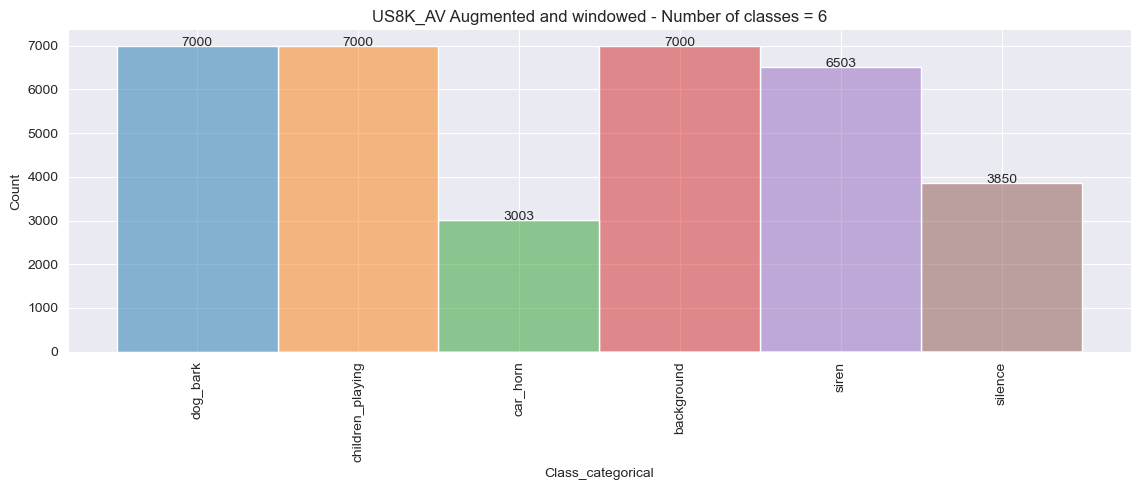

In [96]:
# Analysis of the class balancing

sns.set_style("darkgrid")
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'
gTitle = nom_dataset + ' Augmented and windowed - Number of classes = ' + str(len(pd.Series(DB_aug_wind_from_pkl['Class_categorical']).unique()))
g = sns.displot(DB_aug_wind_from_pkl, x='Class_categorical', hue='Class_categorical',height = 5, aspect = 2).set(title=gTitle)
g.set_xticklabels(rotation=90)
g.set_titles('Number of classes')

# Retrieve the axes object from the plot
axes = g.ax

# Iterate over each bar in the plot
for p in axes.patches:
    # Get the coordinates of the bar
    width = p.get_width()
    height = p.get_height()
    cord_x, cord_y = p.get_xy()
    if height > 0:
        axes.annotate(f'{height}', (cord_x + width/2, cord_y + height), ha='center')
        
g._legend.remove()

plt.tight_layout()
plt.savefig(os.path.join(path_pic, picture_name))

# End of notebook